In [ ]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()



,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


In [ ]:
z_candidates = particles[(particles['Q1'] == -1) & (particles['Q2'] == -1)]

# Visualizar los primeros eventos seleccionados
z_candidates.head()
cantidad_datas = z_candidates.shape[0]
print("Número de datos después de aplicar el filtro:", cantidad_datas)

Número de datos después de aplicar el filtro: 150


In [ ]:
z_candidates = particles[(particles['Q1'] == 1) & (particles['Q2'] == 1)]

# Visualizar los primeros eventos seleccionados
z_candidates.head()
cantidad_datas = z_candidates.shape[0]
print("Número de datos después de aplicar el filtro:", cantidad_datas)

Número de datos después de aplicar el filtro: 186


In [ ]:
# Filtrar eventos donde ambas cargas no sean positivas ni negativas
z_candidates = particles[~((particles['Q1'] == 1) & (particles['Q2'] == 1)) & ~((particles['Q1'] == -1) & (particles['Q2'] == -1))]
cantidad_datos = z_candidates.shape[0]
print("Número de datos después de aplicar el filtro:", cantidad_datos)
z_candidates.head()

Número de datos después de aplicar el filtro: 9664


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


In [ ]:
z_candidates_iso_cero = z_candidates[(z_candidates['iso1'] == 0) & (z_candidates['iso2'] == 0)]

cantidad_datos_iso_cero = z_candidates_iso_cero.shape[0]
print("Número de datos después de aplicar el filtro adicional:", cantidad_datos_iso_cero)

z_candidates_iso_cero.head()


Número de datos después de aplicar el filtro adicional: 4832


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0,28.5389,0.3852,-1.9912,1,0.0515,0.0
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0,30.2344,-0.4684,1.8833,1,-0.0876,0.0
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0,48.2790,-0.1956,2.9703,-1,-0.0492,0.0
5,165617,77255513,38.9425,0.3522,-2.2649,-1,0.0384,0.0,39.8616,0.2630,0.9183,1,-0.0407,0.0
8,165617,77076988,38.1511,-0.8702,1.7165,1,-0.0840,0.0,37.8959,0.5000,-1.8676,-1,0.0652,0.0


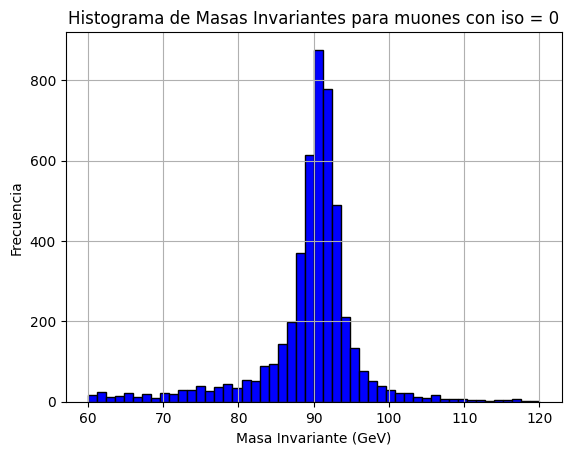

In [ ]:
import matplotlib.pyplot as plt

masas_invariantes_iso_cero = []

def calcular_masa_invariante(pt1, eta1, phi1, pt2, eta2, phi2):
    return np.sqrt(2 * pt1 * pt2 * (np.cosh(eta1 - eta2) - np.cos(phi1 - phi2)))

# Iterar sobre los eventos en z_candidates_iso_cero
for index, row in z_candidates_iso_cero.iterrows():
    pt1 = row['pt1']
    eta1 = row['eta1']
    phi1 = row['phi1']
    pt2 = row['pt2']
    eta2 = row['eta2']
    phi2 = row['phi2']

    # Calcular la masa invariante para el par de muones
    masa_invariante = calcular_masa_invariante(pt1, eta1, phi1, pt2, eta2, phi2)

    # Agregar la masa invariante a la lista
    masas_invariantes_iso_cero.append(masa_invariante)

# Graficar el histograma de las masas invariantes
plt.hist(masas_invariantes_iso_cero, bins=50, color='blue', edgecolor='black')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Masas Invariantes para muones con iso = 0')
plt.grid(True)
plt.show()


In [ ]:
# Imprimir la lista de masas invariantes de manera organizada
print("Lista de masas invariantes para muones con iso = 0:")
for i in range(0, len(masas_invariantes_iso_cero), 10):
    print('\t'.join([f'{masa:.2f}' for masa in masas_invariantes_iso_cero[i:i+10]]))



Número de masas invariantes: 4832
Lista de masas invariantes para muones con iso = 0:
88.81	88.47	90.33	78.86	93.12	92.94	90.41	89.35	91.30	92.49
85.91	88.39	91.18	99.11	89.59	91.34	90.94	90.93	88.54	85.93
91.44	92.86	89.87	94.39	91.32	76.84	93.52	90.10	97.44	87.93
88.31	90.98	91.48	86.89	90.30	89.80	91.88	89.56	90.65	92.55
89.63	90.21	90.56	94.15	92.81	86.70	89.27	90.27	93.22	92.02
86.65	83.30	89.71	91.79	88.75	83.81	81.44	88.99	91.04	89.72
89.79	90.89	88.82	87.62	93.79	88.35	84.55	88.88	93.31	89.64
92.68	96.19	90.90	87.63	89.57	90.05	88.47	85.70	91.19	87.45
92.28	91.80	91.19	91.30	86.50	94.63	91.55	109.94	89.68	91.07
93.85	90.63	98.50	91.26	95.37	96.86	93.48	91.40	102.96	90.32
89.49	77.46	93.99	88.15	91.19	89.72	93.22	87.78	90.77	90.11
94.74	89.58	92.63	90.88	79.65	62.22	90.33	97.83	91.40	93.23
92.09	93.09	92.53	90.94	90.34	92.19	90.05	91.72	92.05	89.59
89.13	92.26	93.37	92.12	90.54	87.78	90.00	63.25	98.73	89.60
84.42	89.59	90.69	90.23	87.04	76.96	87.94	93.75	93.77	93.65
94.01	90.23	

In [ ]:
# Definir el rango alrededor del valor de masa del bosón Z
valor_boson_z = 91.2  # GeV
rango_aceptable = 1.0  # GeV

# Seleccionar solo los valores que se acerquen al valor del bosón Z
valores_cercanos_z = [masa for masa in masas_invariantes_iso_cero if abs(masa - valor_boson_z) < rango_aceptable]
print("Número de valores cercanos al valor del bosón Z:", len(valores_cercanos_z))
print("Valores cercanos al valor del bosón Z:")
print(valores_cercanos_z)


Número de valores cercanos al valor del bosón Z: 1415
Valores cercanos al valor del bosón Z:
[90.33242912854985, 90.41243400397802, 91.29690223255568, 91.18117032996902, 91.3357034164952, 90.93693010780922, 90.93194853927628, 91.4371079124252, 91.32000696779212, 90.97959462511727, 91.4812512445502, 90.30095031032326, 91.88247540708828, 90.64794314410392, 90.21450646245218, 90.56491031112004, 90.26580734043375, 92.01727195943454, 91.78807089703837, 91.0363825294831, 90.89337731404706, 90.89966056812534, 91.1897283092282, 91.80046872308809, 91.18975306587056, 91.30221476233217, 91.55159112471561, 91.06777967349402, 90.62761340603696, 91.25805838690812, 91.39923853579748, 90.31801249750168, 91.19423489705986, 90.76644924608632, 90.88064446732838, 90.33177587929016, 91.4027512932179, 92.09247988292496, 90.9363861885685, 90.33600263510317, 92.19334319418448, 91.7158807034105, 92.04859186541208, 92.11921379473186, 90.54135391382445, 90.68944376788717, 90.2254550707347, 90.23151433451837, 91.

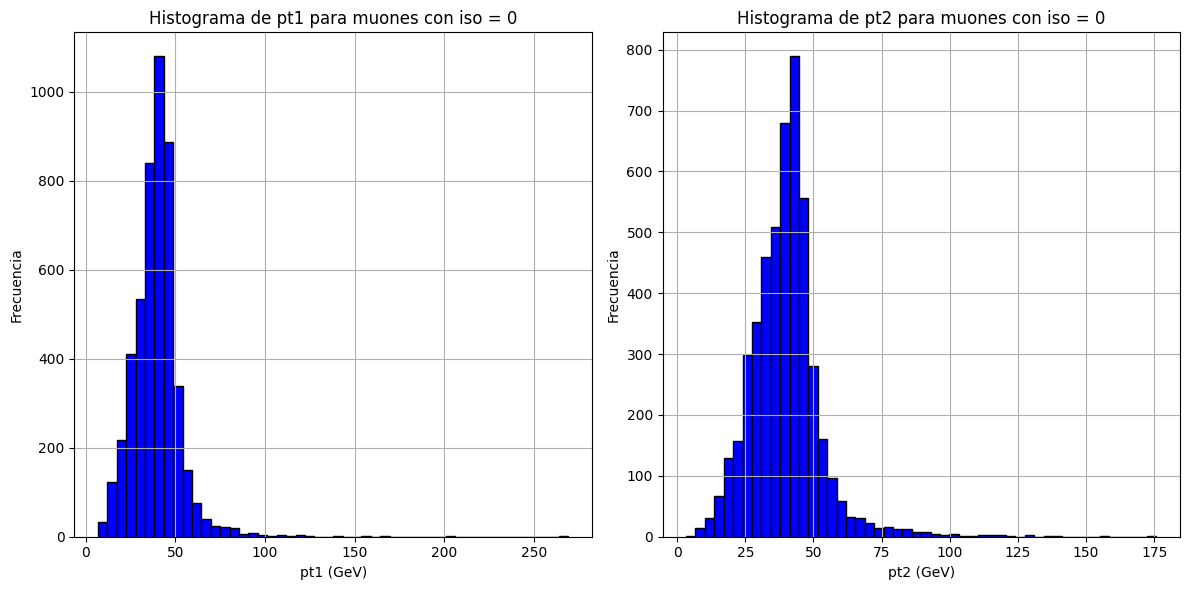

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el histograma de pt1 en el primer eje
axes[0].hist(z_candidates_iso_cero['pt1'], bins=50, color='blue', edgecolor='black')
axes[0].set_xlabel('pt1 (GeV)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de pt1 para muones con iso = 0')
axes[0].grid(True)

# Graficar el histograma de pt2 en el segundo eje
axes[1].hist(z_candidates_iso_cero['pt2'], bins=50, color='blue', edgecolor='black')
axes[1].set_xlabel('pt2 (GeV)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de pt2 para muones con iso = 0')
axes[1].grid(True)


plt.tight_layout()


plt.show()


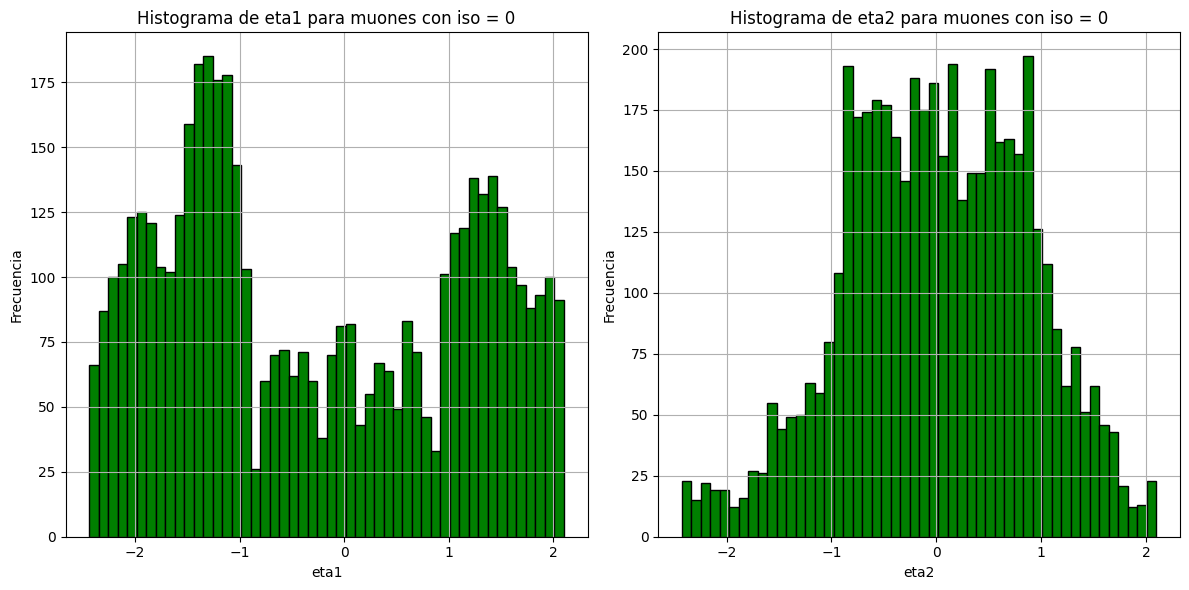

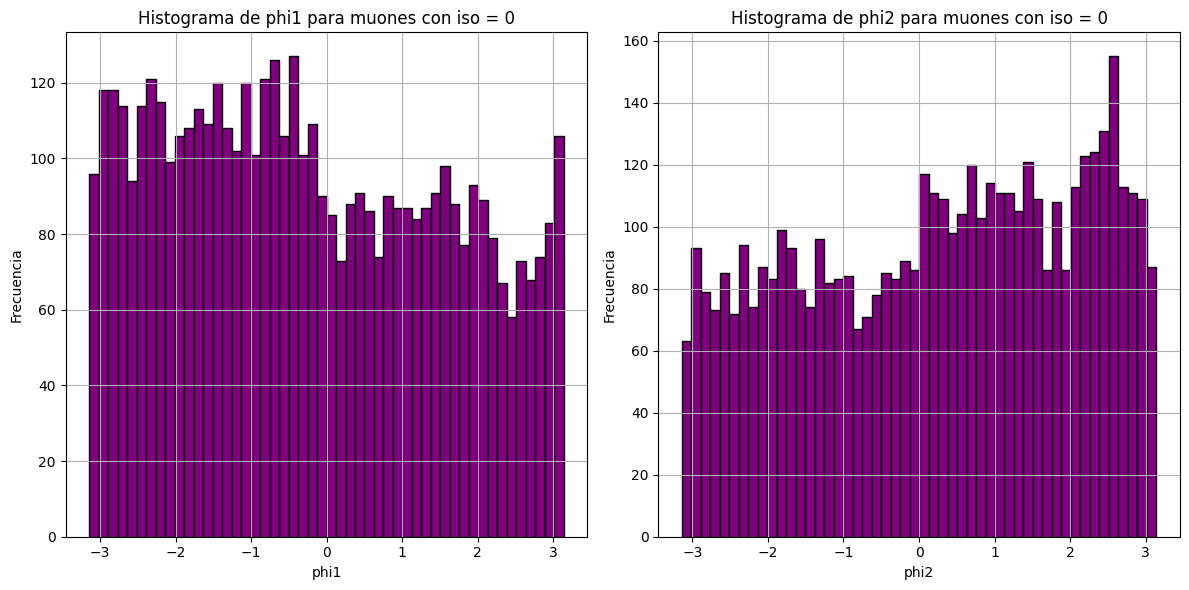

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el histograma de eta1 en el primer eje
axes[0].hist(z_candidates_iso_cero['eta1'], bins=50, color='green', edgecolor='black')
axes[0].set_xlabel('eta1')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de eta1 para muones con iso = 0')
axes[0].grid(True)

# Graficar el histograma de eta2 en el segundo eje
axes[1].hist(z_candidates_iso_cero['eta2'], bins=50, color='green', edgecolor='black')
axes[1].set_xlabel('eta2')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de eta2 para muones con iso = 0')
axes[1].grid(True)


plt.tight_layout()


plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el histograma de phi1 en el primer eje
axes[0].hist(z_candidates_iso_cero['phi1'], bins=50, color='purple', edgecolor='black')
axes[0].set_xlabel('phi1')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de phi1 para muones con iso = 0')
axes[0].grid(True)

# Graficar el histograma de phi2 en el segundo eje
axes[1].hist(z_candidates_iso_cero['phi2'], bins=50, color='purple', edgecolor='black')
axes[1].set_xlabel('phi2')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de phi2 para muones con iso = 0')
axes[1].grid(True)

plt.tight_layout()


plt.show()
